In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
#from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import datetime

In [4]:
wd = os.getcwd()
print("Working Directory:",wd)
# Create a folder for upcoming results
output_folder_path = os.path.join(wd, "London_Energy_Weather")
if not os.path.exists(output_folder_path): os.mkdir(output_folder_path)
import os
wd = os.getcwd()
wd

Working Directory: C:\Users\user\Python\Capstone\Data


'C:\\Users\\user\\Python\\Capstone\\Data'


# Prepare combine datasets
- Used pd.read_csv to import all datasets
- Use for loop to store dataframes in a list
- Join data frames using pd.concat
- Save the joined data frame as a csv file

In [5]:
# Join 112 data sets 
list_of_detaframes = []
for num in range(0,112):
    df_daily = pd.read_csv("daily_dataset/block_"+str(num)+".csv")
    df_selection = df_daily[df_daily["energy_count"]==48][['day','LCLid','energy_sum']]
    list_of_detaframes.append(df_selection)

len(list_of_detaframes)

112

In [6]:
df_all_daily_dataset = pd.concat(list_of_detaframes)
df_all_daily_dataset = df_all_daily_dataset.reset_index(drop = True)
df_all_daily_dataset["day"]=pd.to_datetime(df_all_daily_dataset["day"], format='%Y-%m-%d') # string type is changed to date type
print(df_all_daily_dataset.shape) # note without the df_daily["energy_count"]==48 condition the shape was (3510433, 3)
df_all_daily_dataset.head()

(3469352, 3)


,day,LCLid,energy_sum
0,2012-10-13,MAC000002,11.087
1,2012-10-14,MAC000002,13.223
2,2012-10-15,MAC000002,10.257
3,2012-10-16,MAC000002,9.769
4,2012-10-17,MAC000002,10.885


In [7]:
df_all_daily_dataset.to_csv("daily_dataset/daily_dataset_all_blocks.csv")

In [8]:
df_detailsacorn=pd.read_csv("acorn_details.csv",encoding = "ISO-8859-1")
df_detailsacorn.head()


,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


## Read the combined daily_dataset

In [9]:
import pandas as pd
df_all_daily_dataset = pd.read_csv("daily_dataset/daily_dataset_all_blocks.csv", index_col='Unnamed: 0')
print(df_all_daily_dataset.shape)
df_all_daily_dataset.head()

(3469352, 3)


,day,LCLid,energy_sum
0,2012-10-13,MAC000002,11.087
1,2012-10-14,MAC000002,13.223
2,2012-10-15,MAC000002,10.257
3,2012-10-16,MAC000002,9.769
4,2012-10-17,MAC000002,10.885


In [10]:
df_all_daily_dataset['day']

0          2012-10-13
1          2012-10-14
2          2012-10-15
3          2012-10-16
4          2012-10-17
              ...    
3469347    2014-02-23
3469348    2014-02-24
3469349    2014-02-25
3469350    2014-02-26
3469351    2014-02-27
Name: day, Length: 3469352, dtype: object

In [11]:
df_all_daily_dataset['day'] = pd.to_datetime(df_all_daily_dataset['day'], errors='coerce')
df_all_daily_dataset['day']

0         2012-10-13
1         2012-10-14
2         2012-10-15
3         2012-10-16
4         2012-10-17
             ...    
3469347   2014-02-23
3469348   2014-02-24
3469349   2014-02-25
3469350   2014-02-26
3469351   2014-02-27
Name: day, Length: 3469352, dtype: datetime64[ns]

In [12]:
df_detailsacorn=pd.read_csv("acorn_details.csv",encoding = "ISO-8859-1")
df_detailsacorn.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


In [13]:
df_bankholidays=pd.read_csv("uk_bank_holidays.csv",encoding = "ISO-8859-1")
df_bankholidays.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [14]:

df_weatherdaily=pd.read_csv("weather_daily_darksky.csv",encoding = "ISO-8859-1")
df_weatherdaily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


## Exploration of the data set

In [15]:
housecount = df_all_daily_dataset.groupby(["day"])[['LCLid']].nunique()
print("Number of available days:", len(housecount))
housecount.head()

Number of available days: 827


,LCLid
day,
2011-11-24,13
2011-11-25,25
2011-11-26,32
2011-11-27,41
2011-11-28,41


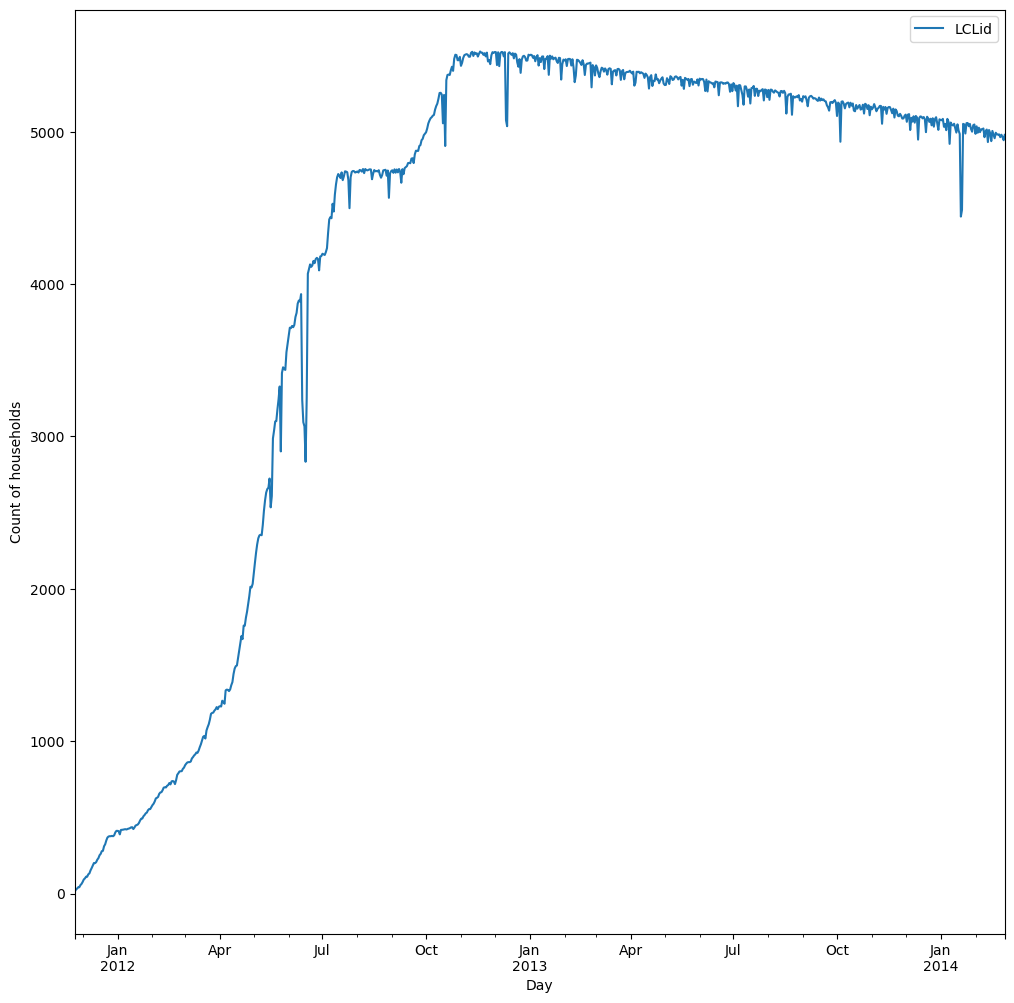

In [16]:
fig,ax=plt.subplots(figsize=(12,12))
housecount.plot(ax=ax)
plt.xlabel("Day")
plt.ylabel("Count of households")
##fig.tight_layout()
plt.show()
ax.figure.savefig("Results/count_householdday.png")


In [17]:
housecount

,LCLid
day,
2011-11-24,13
2011-11-25,25
2011-11-26,32
2011-11-27,41
2011-11-28,41
...,...
2014-02-23,4963
2014-02-24,4979
2014-02-25,4964


In [18]:
df_all_daily_dataset = df_all_daily_dataset.set_index("day")
df_all_daily_dataset

,LCLid,energy_sum
day,,
2012-10-13,MAC000002,11.087
2012-10-14,MAC000002,13.223
2012-10-15,MAC000002,10.257
2012-10-16,MAC000002,9.769
2012-10-17,MAC000002,10.885
...,...,...
2014-02-23,MAC004828,0.683
2014-02-24,MAC004828,2.587
2014-02-25,MAC004828,0.720


In [19]:
# df_generalheatmap = df_dailyselection_zoom.groupby(["day"]).mean()
df_generalheatmap = df_all_daily_dataset.groupby(["day"]).agg({"energy_sum":"mean"}) # "mean" can be changes to "sum" and the trend will be the same.
df_generalheatmap = df_generalheatmap.rename(columns={"energy_sum": "avg_energy"})
df_generalheatmap

,avg_energy
day,
2011-11-24,10.728615
2011-11-25,10.182200
2011-11-26,10.610687
2011-11-27,10.850805
2011-11-28,10.105561
...,...
2014-02-23,11.495899
2014-02-24,10.421352
2014-02-25,10.294125


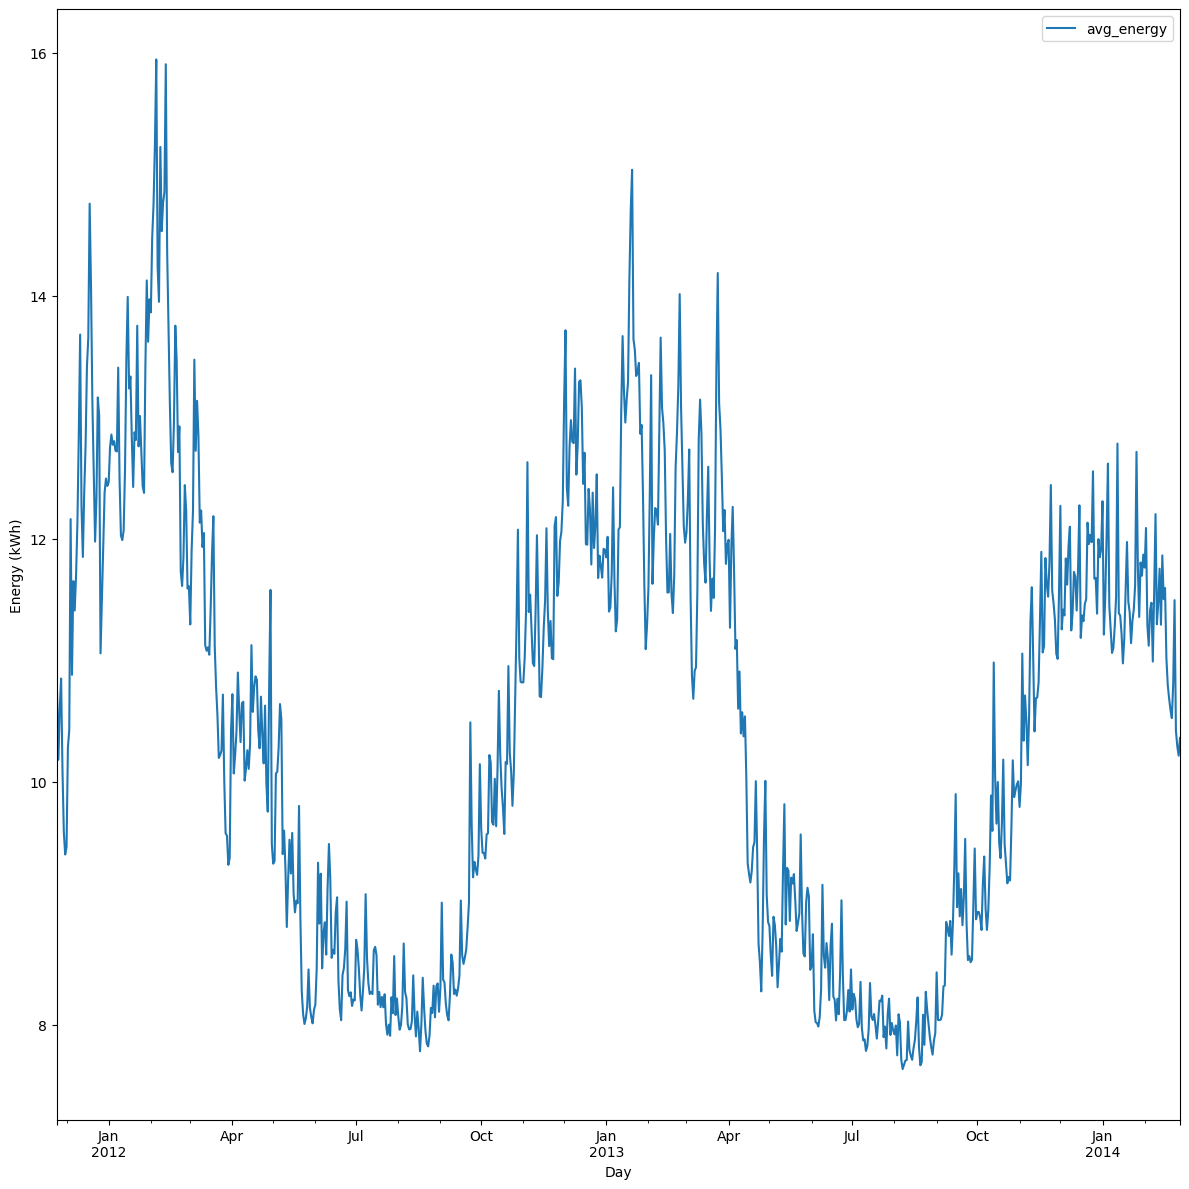

In [20]:
# Example of using subplots is for groupby
# fig, ax = plt.subplots()
# df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
#
folder_savepicture = "Results"
fig,ax=plt.subplots(figsize=(12,12))
df_generalheatmap.plot(ax=ax,kind="line",use_index=True)
plt.xlabel("Day")
plt.ylabel("Energy (kWh)")
fig.tight_layout()
plt.show()
ax.figure.savefig("Results/timeseries_sumall.png")

### Relationship of weather conditions with electricity consumption


### Temperature
 - Relation between Daily Average Energy Consumption and Daily Average Outdoor Temperature

In [23]:
# weather_daily_darksky.csv : the daily informations on the weather from darksky at London during the stud
df_weatherdaily=pd.read_csv("weather_daily_darksky.csv",encoding = "ISO-8859-1")
print(df_weatherdaily.shape)
df_weatherdaily.head()

(882, 32)


,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [26]:
df_weatherdaily.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [27]:
df_weatherdaily["time"]

0      2011-11-11 00:00:00
1      2011-12-11 00:00:00
2      2011-12-27 00:00:00
3      2011-12-02 00:00:00
4      2011-12-24 00:00:00
              ...         
877    2014-01-26 00:00:00
878    2014-02-27 00:00:00
879    2014-03-09 00:00:00
880    2014-02-12 00:00:00
881    2014-02-15 00:00:00
Name: time, Length: 882, dtype: object

In [50]:
df_weatherdaily['time'] = pd.to_datetime(df_weatherdaily['time'], errors='coerce')
df_weatherdaily['time']

day
2011-11-01   2011-11-01
2011-11-02   2011-11-02
2011-11-03   2011-11-03
2011-11-04   2011-11-04
2011-11-05   2011-11-05
                ...    
2014-03-26   2014-03-26
2014-03-27   2014-03-27
2014-03-28   2014-03-28
2014-03-29   2014-03-29
2014-03-30   2014-03-30
Name: time, Length: 879, dtype: datetime64[ns]

In [51]:
df_weatherdaily=df_weatherdaily.sort_values(["time"])
df_weatherdaily["time"]



day
2011-11-01   2011-11-01
2011-11-02   2011-11-02
2011-11-03   2011-11-03
2011-11-04   2011-11-04
2011-11-05   2011-11-05
                ...    
2014-03-26   2014-03-26
2014-03-27   2014-03-27
2014-03-28   2014-03-28
2014-03-29   2014-03-29
2014-03-30   2014-03-30
Name: time, Length: 879, dtype: datetime64[ns]

In [52]:
df_weatherdaily["day"]=df_weatherdaily.apply(lambda row:row["time"].strftime("%Y-%m-%d"),axis=1)

In [53]:
df_weatherdaily["day"]


day
2011-11-01    2011-11-01
2011-11-02    2011-11-02
2011-11-03    2011-11-03
2011-11-04    2011-11-04
2011-11-05    2011-11-05
                 ...    
2014-03-26    2014-03-26
2014-03-27    2014-03-27
2014-03-28    2014-03-28
2014-03-29    2014-03-29
2014-03-30    2014-03-30
Name: day, Length: 879, dtype: object

In [54]:
df_weatherdaily.shape

(879, 33)

In [55]:
df_weatherdaily=df_weatherdaily.drop_duplicates(["day"])
df_weatherdaily.shape


(879, 33)

In [56]:
df_weatherdaily["day"]

day
2011-11-01    2011-11-01
2011-11-02    2011-11-02
2011-11-03    2011-11-03
2011-11-04    2011-11-04
2011-11-05    2011-11-05
                 ...    
2014-03-26    2014-03-26
2014-03-27    2014-03-27
2014-03-28    2014-03-28
2014-03-29    2014-03-29
2014-03-30    2014-03-30
Name: day, Length: 879, dtype: object

In [59]:
df_weatherdaily["day"]=pd.to_datetime(df_weatherdaily["day"], format='%Y-%m-%d')


In [60]:
df_weatherdaily["day"]

day
2011-11-01   2011-11-01
2011-11-02   2011-11-02
2011-11-03   2011-11-03
2011-11-04   2011-11-04
2011-11-05   2011-11-05
                ...    
2014-03-26   2014-03-26
2014-03-27   2014-03-27
2014-03-28   2014-03-28
2014-03-29   2014-03-29
2014-03-30   2014-03-30
Name: day, Length: 879, dtype: datetime64[ns]

In [61]:
df_weatherdaily=df_weatherdaily.set_index("day")

df_weatherdaily

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
day,,,,,,,,,,,,,,,,,,,,,
2011-11-01,15.57,2011-11-01 15:00:00,208,partly-cloudy-day,10.13,2011-11-01 22:00:00,0.36,2.45,1009.46,2011-11-01 22:00:00,...,15.57,2011-11-01 06:54:29,2011-11-01 15:00:00,2011-11-01 10:00:00,Partly cloudy until evening.,2011-11-02 03:00:00,9.01,2011-11-01 15:00:00,2011-11-02 03:00:00,0.21
2011-11-02,15.19,2011-11-02 23:00:00,134,partly-cloudy-night,10.23,2011-11-02 03:00:00,0.39,4.39,1004.79,2011-11-02 03:00:00,...,15.06,2011-11-02 06:56:16,2011-11-02 13:00:00,2011-11-02 09:00:00,Partly cloudy throughout the day.,2011-11-02 19:00:00,7.33,2011-11-02 23:00:00,2011-11-02 19:00:00,0.24
2011-11-03,17.41,2011-11-03 14:00:00,154,partly-cloudy-day,13.39,2011-11-03 21:00:00,0.52,3.99,993.40,2011-11-03 21:00:00,...,17.41,2011-11-03 06:58:03,2011-11-03 14:00:00,2011-11-03 10:00:00,Partly cloudy throughout the day.,2011-11-04 07:00:00,12.79,2011-11-03 14:00:00,2011-11-04 07:00:00,0.27
2011-11-04,15.54,2011-11-04 11:00:00,179,fog,12.03,2011-11-04 23:00:00,0.50,2.62,995.54,2011-11-04 23:00:00,...,15.54,2011-11-04 06:59:49,2011-11-04 11:00:00,2011-11-04 10:00:00,Foggy overnight.,2011-11-05 02:00:00,11.53,2011-11-04 11:00:00,2011-11-05 02:00:00,0.31
2011-11-05,13.94,2011-11-05 15:00:00,346,fog,10.96,2011-11-05 02:00:00,0.65,2.70,1007.39,2011-11-05 02:00:00,...,13.94,2011-11-05 07:01:36,2011-11-05 15:00:00,2011-11-05 10:00:00,Foggy in the morning.,2011-11-06 05:00:00,10.17,2011-11-05 15:00:00,2011-11-06 06:00:00,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-26,8.48,2014-03-26 14:00:00,1,fog,1.70,2014-03-26 05:00:00,0.46,2.49,1017.28,2014-03-26 05:00:00,...,8.48,2014-03-26 05:50:58,2014-03-26 14:00:00,2014-03-26 10:00:00,Foggy in the morning.,2014-03-27 05:00:00,-0.09,2014-03-26 14:00:00,2014-03-27 06:00:00,0.84
2014-03-27,10.04,2014-03-27 13:00:00,75,fog,2.08,2014-03-27 05:00:00,0.44,2.36,1012.88,2014-03-27 06:00:00,...,10.04,2014-03-27 05:48:40,2014-03-27 13:00:00,2014-03-27 13:00:00,Foggy overnight.,2014-03-28 03:00:00,0.62,2014-03-27 13:00:00,2014-03-28 03:00:00,0.88
2014-03-28,12.43,2014-03-28 14:00:00,87,fog,3.67,2014-03-28 03:00:00,0.19,3.31,1014.82,2014-03-28 03:00:00,...,12.43,2014-03-28 05:46:23,2014-03-28 14:00:00,2014-03-28 11:00:00,Foggy in the morning.,2014-03-29 01:00:00,1.69,2014-03-28 14:00:00,2014-03-29 02:00:00,0.92


### Merge df_general heat map with daily weather

In [ ]:
https://pandas.pydata.org/docs/reference/api/pandas.merge.html